In [1]:
#importing libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import statistics
import re
import spacy
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [2]:
#fetching the reviews of the product from Amazon website
url = "https://www.amazon.in/Titan-Black-Mens-Wallet-TW112LM1BK/product-reviews/B00I3WUZN4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
reviewlist = []

def get_soup(url):
    r = requests.get(url) # or....r = requests.get("http://localhost:8080/render.html", params = {"url" : url , "wait" :2}) 
    soup = BeautifulSoup(r.text, "html.parser")
    return soup

def get_reviews(soup):
    reviews = soup.find_all("div", {"data-hook" : "review"})    
    try:
        for item in reviews:
            review = {
            "title" : item.find("a", {"data-hook" : "review-title"}).text.strip(),
            "rating" : float(item.find("i", {"data-hook" : "review-star-rating"}).text.replace("out of 5 stars", "").strip()), # return starts values & float to replace this 3.0 out of 5 stars to this 3.0
            "body" : item.find("span", {"data-hook" : "review-body"}).text.strip(),
             }
            reviewlist.append(review)
    except:
        pass
    
for x in range(1,100):
    soup = get_soup("https://www.amazon.in/Titan-Black-Mens-Wallet-TW112LM1BK/product-reviews/B00I3WUZN4/ref=cm_cr_getr_d_paging_btm_next_34?ie=UTF8&reviewerType=all_reviews&pageNumber={x}")               
    print(f"Getting page:{x}")
    get_reviews(soup)
    print(len(reviewlist))
    if not soup.find("li", {"class" : "a-disabled a-last"}):
        pass
    else:
        break

Getting page:1
10
Getting page:2
10
Getting page:3
10
Getting page:4
20
Getting page:5
30
Getting page:6
40
Getting page:7
40
Getting page:8
50
Getting page:9
60
Getting page:10
70
Getting page:11
80
Getting page:12
90
Getting page:13
90
Getting page:14
100
Getting page:15
110
Getting page:16
120
Getting page:17
130
Getting page:18
140
Getting page:19
140
Getting page:20
150
Getting page:21
160
Getting page:22
170
Getting page:23
180
Getting page:24
190
Getting page:25
200
Getting page:26
200
Getting page:27
210
Getting page:28
220
Getting page:29
220
Getting page:30
230
Getting page:31
230
Getting page:32
230
Getting page:33
230
Getting page:34
240
Getting page:35
250
Getting page:36
250
Getting page:37
260
Getting page:38
270
Getting page:39
280
Getting page:40
290
Getting page:41
290
Getting page:42
300
Getting page:43
300
Getting page:44
310
Getting page:45
320
Getting page:46
330
Getting page:47
340
Getting page:48
340
Getting page:49
350
Getting page:50
360
Getting page:51
370
Ge

In [3]:
print(soup.title.text)

Amazon.in:Customer reviews: TITAN Black Leather Men&#39;s Wallet(TW112LM1BK)


In [4]:
soup = get_soup("https://www.amazon.in/Titan-Black-Mens-Wallet-TW112LM1BK/product-reviews/B00I3WUZN4/ref=cm_cr_getr_d_paging_btm_next_34?ie=UTF8&reviewerType=all_reviews&pageNumber=1")        
get_reviews(soup)
print(len(reviewlist))

710


In [5]:
df = pd.DataFrame(reviewlist)
df

,title,rating,body
0,Worth buying,5.0,Good product. Genuine leather
1,Good,5.0,Good
2,Looks cheap after few days,2.0,There are some threads loosen up at bottom. I ...
3,Really good product by titan.,5.0,Have been using it for more than 5 years and t...
4,Great material,5.0,Very good quality
...,...,...,...
705,Good product 👍,5.0,Quality of the material is good
706,Value for money,4.0,I used it for.over 2 years..the quality of pro...
707,Good,4.0,Good product
708,Good value for money product,5.0,Very good quality wallet for regular usage


We have the reviews along with their rating and title of their reviews.

In [6]:
#creating a copy
df1 = df.copy()

## Basic Analysis of the data

#### Number of words

We shall see the number of words present in each review.

In [7]:
df1['word_count'] = df1['body'].apply(lambda x: len(str(x).split(" ")))
df1.head()

,title,rating,body,word_count
0,Worth buying,5.0,Good product. Genuine leather,4
1,Good,5.0,Good,1
2,Looks cheap after few days,2.0,There are some threads loosen up at bottom. I ...,20
3,Really good product by titan.,5.0,Have been using it for more than 5 years and t...,42
4,Great material,5.0,Very good quality,3


#### Number of characters

We shall see the number of characters present in each review.

In [8]:
df1['char_count'] = df1['body'].str.len() ## this also includes spaces
df1.head()

,title,rating,body,word_count,char_count
0,Worth buying,5.0,Good product. Genuine leather,4,29
1,Good,5.0,Good,1,4
2,Looks cheap after few days,2.0,There are some threads loosen up at bottom. I ...,20,93
3,Really good product by titan.,5.0,Have been using it for more than 5 years and t...,42,215
4,Great material,5.0,Very good quality,3,17


#### Descriptives

In [9]:
df1.describe()

,rating,word_count,char_count
count,710.000000,710.000000,710.000000
mean,4.500000,20.900000,114.900000
std,0.922604,25.644029,145.157042
min,2.000000,1.000000,4.000000
25%,4.000000,3.000000,17.000000
50%,5.000000,6.500000,36.500000
75%,5.000000,40.000000,215.000000
max,5.000000,84.000000,484.000000


1. The average ratings for the product is 4.
2. The average word count of the review is 20.
3. The average number of characters in the review is 114.

#### Distribution of Ratings

<AxesSubplot:ylabel='rating'>

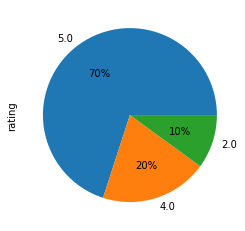

In [10]:
df1['rating'].value_counts().plot(kind='pie',autopct='%1.0f%%')

Seeing to the diagram, around 70% of the reviewers have given 5 stars, 20% have given 4 stars and 10% have given 2 stars.

## General Text-Preprocessing

In [11]:
# Joinining all the reviews into single paragraph 
data = [x.strip() for x in df1.body] # remove both the leading and the trailing characters
data = [x for x in data if x] # removes empty strings, because they are considered in Python as False
data[0:10]

['Good product. Genuine leather',
 'Good',
 "There are some threads loosen up at bottom. I feel in long run it won't last more than a year",
 'Have been using it for more than 5 years and there is not even a single scratch or tear on the leather. Got spacious slots for cash, cards and even got sim, photo holders along with coin slot. Indeed a good product.',
 'Very good quality',
 'Quality of the material is good',
 'I used it for.over 2 years..the quality of product is good...oy bad thing is the fabric linning the coin pocket is really thin...so if you keep more than 10 coins in the wallet..that fabrix will tear spilling out the coins',
 'Good product',
 'Very good quality wallet for regular usage',
 'Are yaar kamaal ka product hai 👌🏻This will not dissapoint you at all. Sleek hai, comfortably fits in ur pocket, ample of space milegi and doesnt feel bulky at all, stuff is very soft and strong, look wise simple and elegant. Chained pocket for coins with another pocket behind, though the

In [12]:
# Joining the list into one string/text
text = ' '.join(data)
text[0:1000]

"Good product. Genuine leather Good There are some threads loosen up at bottom. I feel in long run it won't last more than a year Have been using it for more than 5 years and there is not even a single scratch or tear on the leather. Got spacious slots for cash, cards and even got sim, photo holders along with coin slot. Indeed a good product. Very good quality Quality of the material is good I used it for.over 2 years..the quality of product is good...oy bad thing is the fabric linning the coin pocket is really thin...so if you keep more than 10 coins in the wallet..that fabrix will tear spilling out the coins Good product Very good quality wallet for regular usage Are yaar kamaal ka product hai 👌🏻This will not dissapoint you at all. Sleek hai, comfortably fits in ur pocket, ample of space milegi and doesnt feel bulky at all, stuff is very soft and strong, look wise simple and elegant. Chained pocket for coins with another pocket behind, though there are only 4 card slots with again p

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zarna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text[0:1000]

'Good product Genuine leather Good There are some threads loosen up at bottom I feel in long run it wont last more than a year Have been using it for more than 5 years and there is not even a single scratch or tear on the leather Got spacious slots for cash cards and even got sim photo holders along with coin slot Indeed a good product Very good quality Quality of the material is good I used it forover 2 yearsthe quality of product is goodoy bad thing is the fabric linning the coin pocket is really thinso if you keep more than 10 coins in the walletthat fabrix will tear spilling out the coins Good product Very good quality wallet for regular usage Are yaar kamaal ka product hai 👌🏻This will not dissapoint you at all Sleek hai comfortably fits in ur pocket ample of space milegi and doesnt feel bulky at all stuff is very soft and strong look wise simple and elegant Chained pocket for coins with another pocket behind though there are only 4 card slots with again pocket behind Also you can 

In [15]:
no_punc_text = re.sub("[^A-Za-z" "]+"," ",no_punc_text).lower() #remove special character
# no_punc_text = re.sub("[0-9" "]+"," ",no_punc_text) #remove numbers
# no_punc_text = re.sub(r'^https?:\/\/.*[\r\n]*', '', no_punc_text).lower() #remove hyperlink
no_punc_text[0:1000]

'good product genuine leather good there are some threads loosen up at bottom i feel in long run it wont last more than a year have been using it for more than years and there is not even a single scratch or tear on the leather got spacious slots for cash cards and even got sim photo holders along with coin slot indeed a good product very good quality quality of the material is good i used it forover yearsthe quality of product is goodoy bad thing is the fabric linning the coin pocket is really thinso if you keep more than coins in the walletthat fabrix will tear spilling out the coins good product very good quality wallet for regular usage are yaar kamaal ka product hai this will not dissapoint you at all sleek hai comfortably fits in ur pocket ample of space milegi and doesnt feel bulky at all stuff is very soft and strong look wise simple and elegant chained pocket for coins with another pocket behind though there are only card slots with again pocket behind also you can put cardssl

In [16]:
#Tokenization
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['good', 'product', 'genuine', 'leather', 'good', 'there', 'are', 'some', 'threads', 'loosen', 'up', 'at', 'bottom', 'i', 'feel', 'in', 'long', 'run', 'it', 'wont', 'last', 'more', 'than', 'a', 'year', 'have', 'been', 'using', 'it', 'for', 'more', 'than', 'years', 'and', 'there', 'is', 'not', 'even', 'a', 'single', 'scratch', 'or', 'tear', 'on', 'the', 'leather', 'got', 'spacious', 'slots', 'for']


In [17]:
len(text_tokens)

14484

In [18]:
#importing given stopwords file
with open("D:\Study\Excelr DS\Assignments\AS-11-Text-Mining\stop.txt") as stop_words:
    stop_words = stop_words.read()
    print(stop_words[0:50])

a
a's
able
about
above
according
accordingly
acros


In [19]:
stop_tokens = [word for word in text_tokens if not word in stop_words]
print(stop_tokens[0:40])

['good', 'product', 'genuine', 'leather', 'good', 'threads', 'loosen', 'bottom', 'feel', 'run', 'wont', 'year', 'years', 'single', 'scratch', 'tear', 'leather', 'spacious', 'slots', 'cash', 'cards', 'sim', 'photo', 'holders', 'coin', 'slot', 'good', 'product', 'good', 'quality', 'quality', 'material', 'good', 'forover', 'yearsthe', 'quality', 'product', 'goodoy', 'bad', 'fabric']


In [20]:
# Joinining all the reviews into single paragraph 
stop_string = " ".join(stop_tokens)
stop_string[0:1000]

'good product genuine leather good threads loosen bottom feel run wont year years single scratch tear leather spacious slots cash cards sim photo holders coin slot good product good quality quality material good forover yearsthe quality product goodoy bad fabric linning coin pocket thinso coins walletthat fabrix tear spilling coins good product good quality wallet regular usage yaar kamaal product hai dissapoint sleek hai comfortably fits pocket space milegi doesnt feel bulky stuff soft strong simple elegant chained pocket coins pocket card slots pocket put cardsslot rest product features mentioned description meri salah hai lelo ek number wallet hai good product genuine leather good threads loosen bottom feel run wont year years single scratch tear leather spacious slots cash cards sim photo holders coin slot good product good quality quality material good forover yearsthe quality product goodoy bad fabric linning coin pocket thinso coins walletthat fabrix tear spilling coins good pro

In [21]:
# Normalize the data
lower_words=[Text.lower() for Text in stop_tokens]
print(lower_words[0:50])

['good', 'product', 'genuine', 'leather', 'good', 'threads', 'loosen', 'bottom', 'feel', 'run', 'wont', 'year', 'years', 'single', 'scratch', 'tear', 'leather', 'spacious', 'slots', 'cash', 'cards', 'sim', 'photo', 'holders', 'coin', 'slot', 'good', 'product', 'good', 'quality', 'quality', 'material', 'good', 'forover', 'yearsthe', 'quality', 'product', 'goodoy', 'bad', 'fabric', 'linning', 'coin', 'pocket', 'thinso', 'coins', 'walletthat', 'fabrix', 'tear', 'spilling', 'coins']


In [22]:
# Lemmatization
#import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[:100])

good product genuine leather good threads loosen bottom feel run wont year years single scratch tear leather spacious slots cash cards sim photo holders coin slot good product good quality quality material good forover yearsthe quality product goodoy bad fabric linning coin pocket thinso coins walletthat fabrix tear spilling coins good product good quality wallet regular usage yaar kamaal product hai dissapoint sleek hai comfortably fits pocket space milegi doesnt feel bulky stuff soft strong simple elegant chained pocket coins pocket card slots pocket put cardsslot rest product features mentioned description meri salah hai lelo ek number wallet


In [23]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['good', 'product', 'genuine', 'leather', 'good', 'thread', 'loosen', 'bottom', 'feel', 'run', 'will', 'not', 'year', 'year', 'single', 'scratch', 'tear', 'leather', 'spacious', 'slot', 'cash', 'card', 'sim', 'photo', 'holder', 'coin', 'slot', 'good', 'product', 'good', 'quality', 'quality', 'material', 'good', 'forover', 'yearsthe', 'quality', 'product', 'goodoy', 'bad', 'fabric', 'linne', 'coin', 'pocket', 'thinso', 'coin', 'walletthat', 'fabrix', 'tear', 'spill', 'coin', 'good', 'product', 'good', 'quality', 'wallet', 'regular', 'usage', 'yaar', 'kamaal', 'product', 'hai', 'dissapoint', 'sleek', 'hai', 'comfortably', 'fit', 'pocket', 'space', 'milegi', 'do', 'not', 'feel', 'bulky', 'stuff', 'soft', 'strong', 'simple', 'elegant', 'chain', 'pocket', 'coin', 'pocket', 'card', 'slot', 'pocket', 'put', 'cardsslot', 'rest', 'product', 'feature', 'mention', 'description', 'meri', 'salah', 'hai', 'lelo', 'ek', 'number', 'wallet']


In [24]:
clean_reviews=' '.join(lemmas)
clean_reviews[:1000]

'good product genuine leather good thread loosen bottom feel run will not year year single scratch tear leather spacious slot cash card sim photo holder coin slot good product good quality quality material good forover yearsthe quality product goodoy bad fabric linne coin pocket thinso coin walletthat fabrix tear spill coin good product good quality wallet regular usage yaar kamaal product hai dissapoint sleek hai comfortably fit pocket space milegi do not feel bulky stuff soft strong simple elegant chain pocket coin pocket card slot pocket put cardsslot rest product feature mention description meri salah hai lelo ek number wallet hai good product genuine leather good thread loosen bottom feel run will not year year single scratch tear leather spacious slot cash card sim photo holder coin slot good product good quality quality material good forover yearsthe quality product goodoy bad fabric linne coin pocket thinso coin walletthat fabrix tear spill coin good product good quality wallet

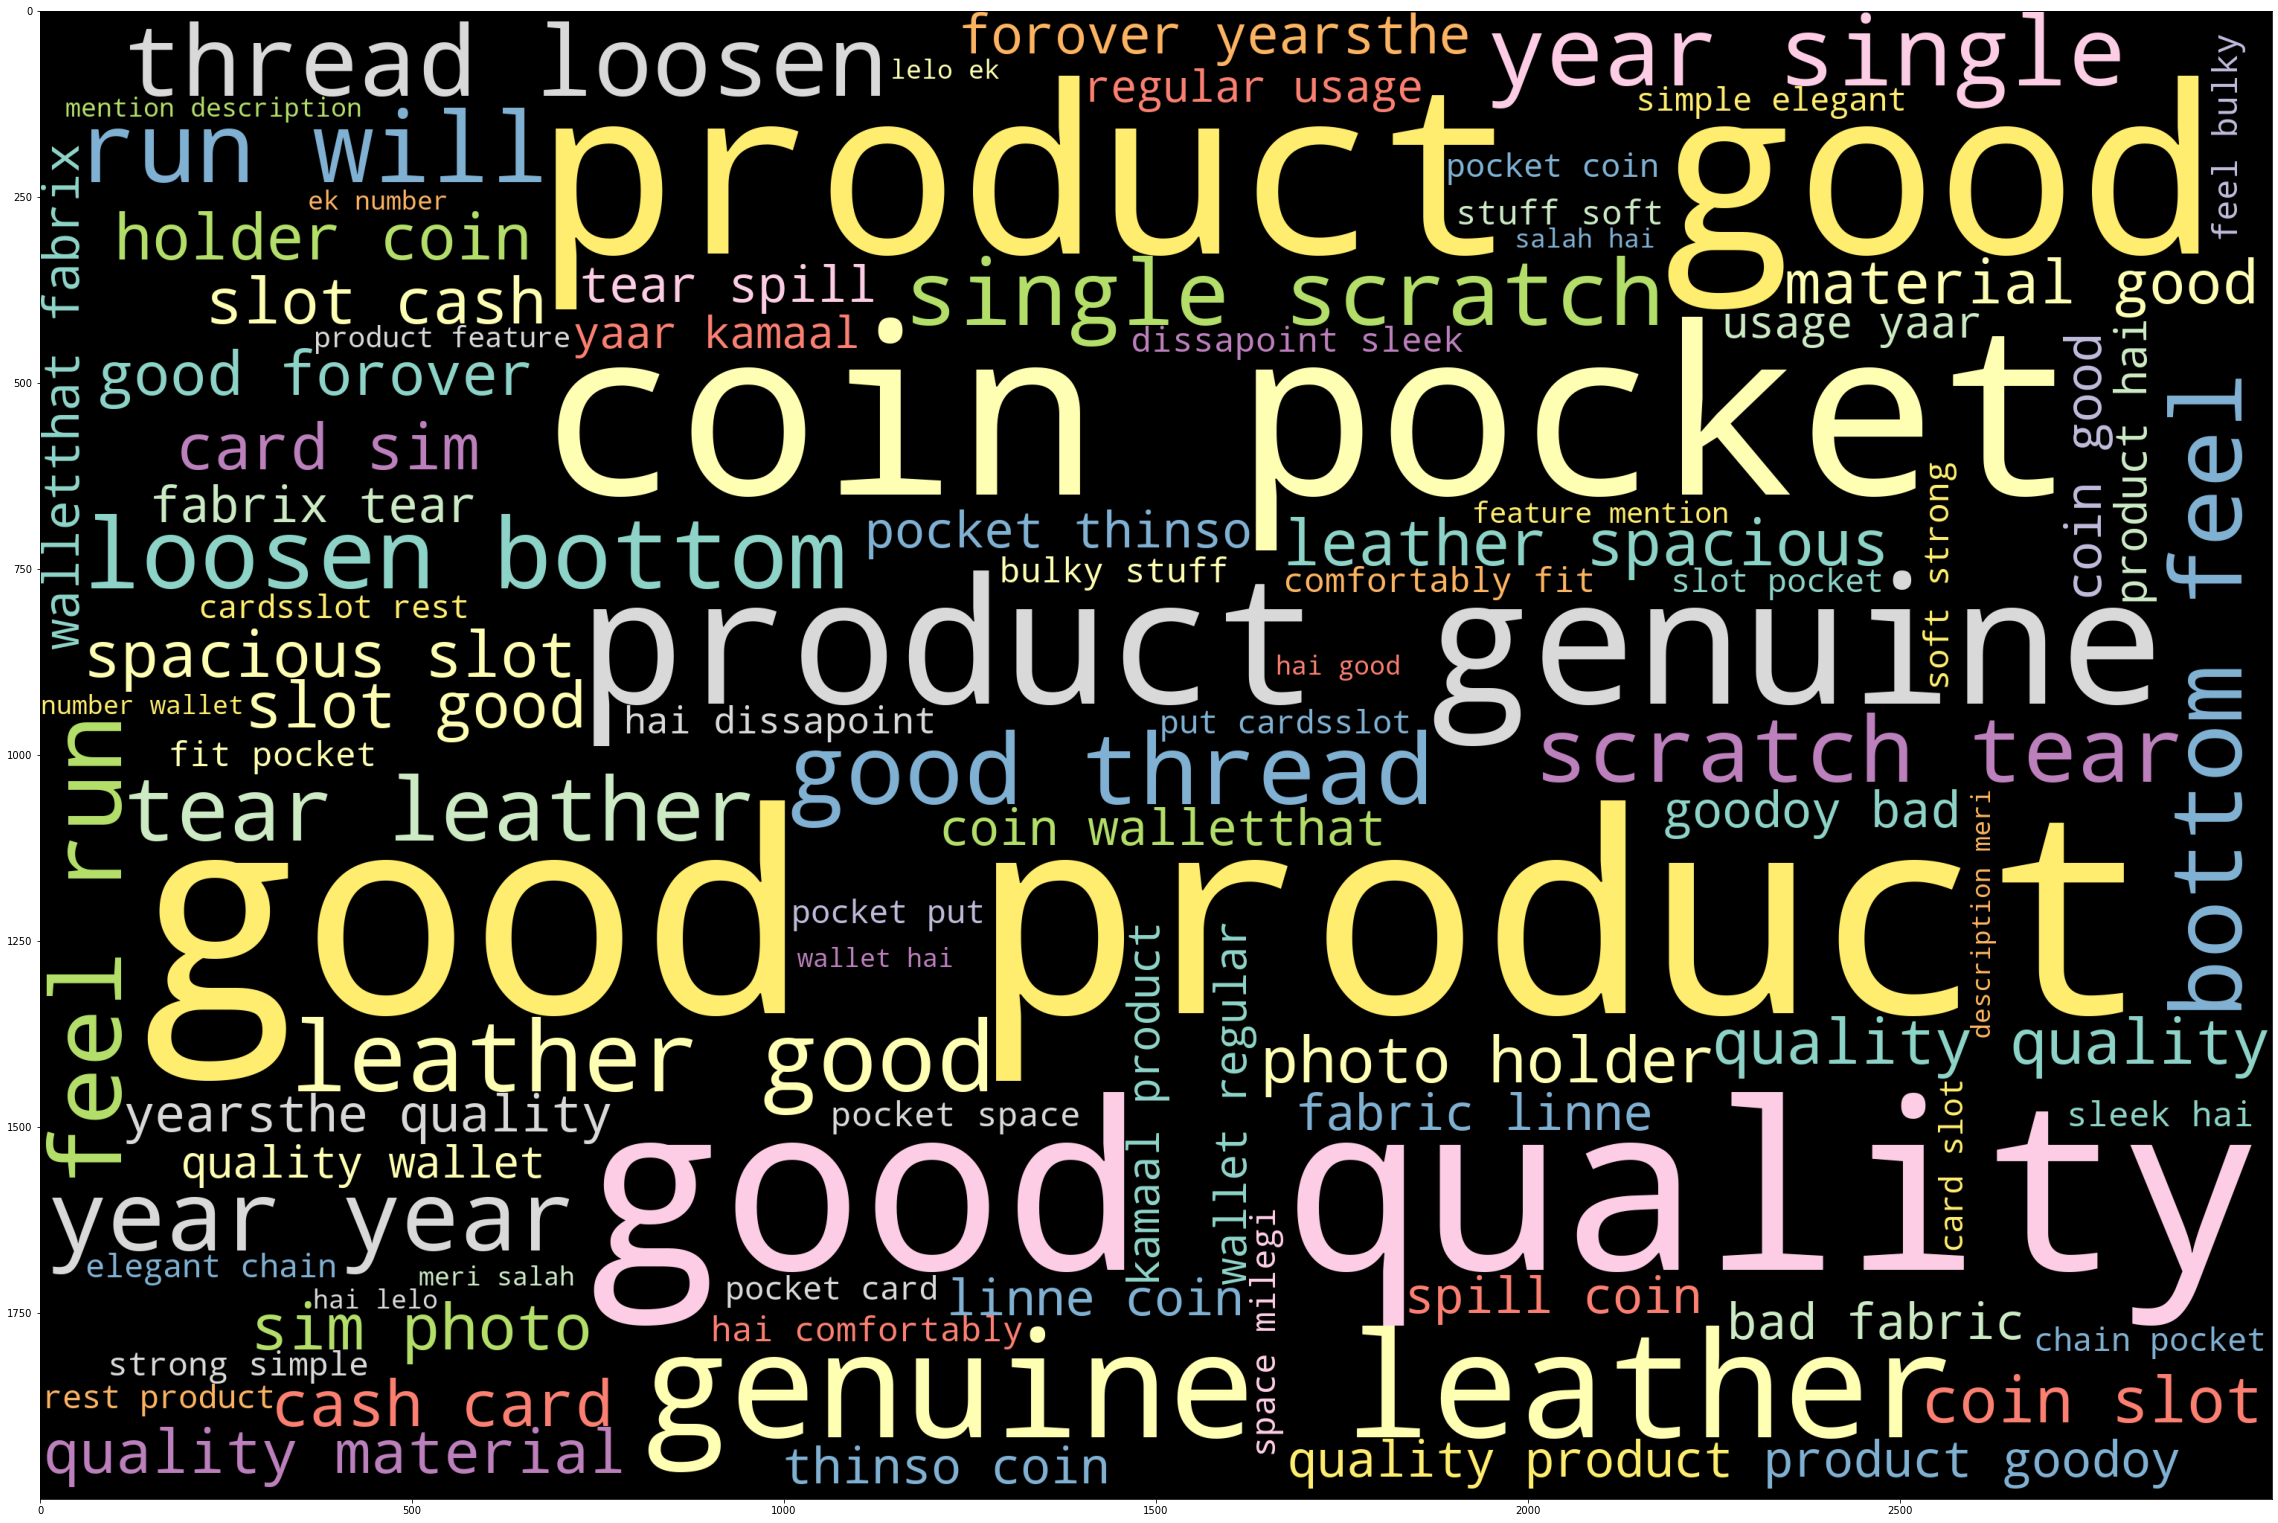

In [25]:
plt.figure(figsize=(40,30))
wordcloud_rev = WordCloud(
                      background_color='black',
                      colormap='Set3_r',
                      width=3000,
                      height=2000,
                     ).generate(clean_reviews)

plt.imshow(wordcloud_rev)

## Sentimental Analysis

In [26]:
# importing the files for negative and positive words

In [27]:
with open("D:\Study\Excelr DS\Assignments\AS-11-Text-Mining\positive-words.txt","r") as pos:
  pos_words = pos.read().split("\n")
  print(pos_words[:100])

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [28]:
with open("D:\\Study\\Excelr DS\\Assignments\\AS-11-Text-Mining\\negative-words.txt","r") as neg:
  neg_words = neg.read().split("\n")
  print(neg_words[:100])

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

### Preprocessing the data

#### 1. Removing punctuations, numbers and special characters

In [29]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [30]:
df['Cleaned_Reviews'] = df['body'].apply(lambda x: clean_text(x))
df.head(11)

,title,rating,body,Cleaned_Reviews
0,Worth buying,5.0,Good product. Genuine leather,good product genuine leather
1,Good,5.0,Good,good
2,Looks cheap after few days,2.0,There are some threads loosen up at bottom. I ...,there are some threads loosen up at bottom i f...
3,Really good product by titan.,5.0,Have been using it for more than 5 years and t...,have been using it for more than years and th...
4,Great material,5.0,Very good quality,very good quality
5,Good product 👍,5.0,Quality of the material is good,quality of the material is good
6,Value for money,4.0,I used it for.over 2 years..the quality of pro...,i used it forover yearsthe quality of product...
7,Good,4.0,Good product,good product
8,Good value for money product,5.0,Very good quality wallet for regular usage,very good quality wallet for regular usage
9,Kamal ka wallet hai👌🏻👍🏻,5.0,Are yaar kamaal ka product hai 👌🏻This will not...,are yaar kamaal ka product hai 👌🏻this will not...


#### 2. Removing emojis

In [31]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [32]:
df['Cleaned_Reviews']=df['Cleaned_Reviews'].apply(lambda x: remove_emoji(x))
df.head(11)

,title,rating,body,Cleaned_Reviews
0,Worth buying,5.0,Good product. Genuine leather,good product genuine leather
1,Good,5.0,Good,good
2,Looks cheap after few days,2.0,There are some threads loosen up at bottom. I ...,there are some threads loosen up at bottom i f...
3,Really good product by titan.,5.0,Have been using it for more than 5 years and t...,have been using it for more than years and th...
4,Great material,5.0,Very good quality,very good quality
5,Good product 👍,5.0,Quality of the material is good,quality of the material is good
6,Value for money,4.0,I used it for.over 2 years..the quality of pro...,i used it forover yearsthe quality of product...
7,Good,4.0,Good product,good product
8,Good value for money product,5.0,Very good quality wallet for regular usage,very good quality wallet for regular usage
9,Kamal ka wallet hai👌🏻👍🏻,5.0,Are yaar kamaal ka product hai 👌🏻This will not...,are yaar kamaal ka product hai this will not d...


#### 3. Removing stopwords

In [33]:
reviews_clean = []
for index, row in df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Cleaned_Reviews.split() if not word in stop_words and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    reviews_clean.append(' '.join(words_without_stopwords))
    
df['absolute_cleaned_reviews'] = reviews_clean
df.head(11)

,title,rating,body,Cleaned_Reviews,absolute_cleaned_reviews
0,Worth buying,5.0,Good product. Genuine leather,good product genuine leather,good product genuine leather
1,Good,5.0,Good,good,good
2,Looks cheap after few days,2.0,There are some threads loosen up at bottom. I ...,there are some threads loosen up at bottom i f...,threads loosen bottom feel run wont year
3,Really good product by titan.,5.0,Have been using it for more than 5 years and t...,have been using it for more than years and th...,years single scratch tear leather spacious slo...
4,Great material,5.0,Very good quality,very good quality,good quality
5,Good product 👍,5.0,Quality of the material is good,quality of the material is good,quality material good
6,Value for money,4.0,I used it for.over 2 years..the quality of pro...,i used it forover yearsthe quality of product...,forover yearsthe quality product goodoy bad fa...
7,Good,4.0,Good product,good product,good product
8,Good value for money product,5.0,Very good quality wallet for regular usage,very good quality wallet for regular usage,good quality wallet regular usage
9,Kamal ka wallet hai👌🏻👍🏻,5.0,Are yaar kamaal ka product hai 👌🏻This will not...,are yaar kamaal ka product hai this will not d...,yaar kamaal product hai dissapoint sleek hai c...


#### 4. Removing tweets with empty text

In [34]:
df = df[df['absolute_cleaned_reviews']!='']
df.head(11)

,title,rating,body,Cleaned_Reviews,absolute_cleaned_reviews
0,Worth buying,5.0,Good product. Genuine leather,good product genuine leather,good product genuine leather
1,Good,5.0,Good,good,good
2,Looks cheap after few days,2.0,There are some threads loosen up at bottom. I ...,there are some threads loosen up at bottom i f...,threads loosen bottom feel run wont year
3,Really good product by titan.,5.0,Have been using it for more than 5 years and t...,have been using it for more than years and th...,years single scratch tear leather spacious slo...
4,Great material,5.0,Very good quality,very good quality,good quality
5,Good product 👍,5.0,Quality of the material is good,quality of the material is good,quality material good
6,Value for money,4.0,I used it for.over 2 years..the quality of pro...,i used it forover yearsthe quality of product...,forover yearsthe quality product goodoy bad fa...
7,Good,4.0,Good product,good product,good product
8,Good value for money product,5.0,Very good quality wallet for regular usage,very good quality wallet for regular usage,good quality wallet regular usage
9,Kamal ka wallet hai👌🏻👍🏻,5.0,Are yaar kamaal ka product hai 👌🏻This will not...,are yaar kamaal ka product hai this will not d...,yaar kamaal product hai dissapoint sleek hai c...


#### 5. Resetting Index 

In [35]:
df = df.reset_index(drop=True)
df.head(11)

,title,rating,body,Cleaned_Reviews,absolute_cleaned_reviews
0,Worth buying,5.0,Good product. Genuine leather,good product genuine leather,good product genuine leather
1,Good,5.0,Good,good,good
2,Looks cheap after few days,2.0,There are some threads loosen up at bottom. I ...,there are some threads loosen up at bottom i f...,threads loosen bottom feel run wont year
3,Really good product by titan.,5.0,Have been using it for more than 5 years and t...,have been using it for more than years and th...,years single scratch tear leather spacious slo...
4,Great material,5.0,Very good quality,very good quality,good quality
5,Good product 👍,5.0,Quality of the material is good,quality of the material is good,quality material good
6,Value for money,4.0,I used it for.over 2 years..the quality of pro...,i used it forover yearsthe quality of product...,forover yearsthe quality product goodoy bad fa...
7,Good,4.0,Good product,good product,good product
8,Good value for money product,5.0,Very good quality wallet for regular usage,very good quality wallet for regular usage,good quality wallet regular usage
9,Kamal ka wallet hai👌🏻👍🏻,5.0,Are yaar kamaal ka product hai 👌🏻This will not...,are yaar kamaal ka product hai this will not d...,yaar kamaal product hai dissapoint sleek hai c...


#### 6. Tokenize 'absolute_cleaned_reviews'

In [36]:
tokenized_reviews = df['absolute_cleaned_reviews'].apply(lambda x: x.split())
tokenized_reviews.head(11)

0                     [good, product, genuine, leather]
1                                                [good]
2      [threads, loosen, bottom, feel, run, wont, year]
3     [years, single, scratch, tear, leather, spacio...
4                                       [good, quality]
5                             [quality, material, good]
6     [forover, yearsthe, quality, product, goodoy, ...
7                                       [good, product]
8               [good, quality, wallet, regular, usage]
9     [yaar, kamaal, product, hai, dissapoint, sleek...
10                    [good, product, genuine, leather]
Name: absolute_cleaned_reviews, dtype: object

#### 7. Converting words to lemma

In [37]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

tokenized_reviews = tokenized_reviews.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_reviews.head(10)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Zarna\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                    [good, product, genuine, leather]
1                                               [good]
2      [thread, loosen, bottom, feel, run, wont, year]
3    [year, single, scratch, tear, leather, spaciou...
4                                      [good, quality]
5                            [quality, material, good]
6    [forover, yearsthe, quality, product, goodoy, ...
7                                      [good, product]
8              [good, quality, wallet, regular, usage]
9    [yaar, kamaal, product, hai, dissapoint, sleek...
Name: absolute_cleaned_reviews, dtype: object

#### 8. Joining all tokens into sentences

In [38]:
df['absolute_cleaned_reviews'] = tokenized_reviews
df.head(11)

,title,rating,body,Cleaned_Reviews,absolute_cleaned_reviews
0,Worth buying,5.0,Good product. Genuine leather,good product genuine leather,"[good, product, genuine, leather]"
1,Good,5.0,Good,good,[good]
2,Looks cheap after few days,2.0,There are some threads loosen up at bottom. I ...,there are some threads loosen up at bottom i f...,"[thread, loosen, bottom, feel, run, wont, year]"
3,Really good product by titan.,5.0,Have been using it for more than 5 years and t...,have been using it for more than years and th...,"[year, single, scratch, tear, leather, spaciou..."
4,Great material,5.0,Very good quality,very good quality,"[good, quality]"
5,Good product 👍,5.0,Quality of the material is good,quality of the material is good,"[quality, material, good]"
6,Value for money,4.0,I used it for.over 2 years..the quality of pro...,i used it forover yearsthe quality of product...,"[forover, yearsthe, quality, product, goodoy, ..."
7,Good,4.0,Good product,good product,"[good, product]"
8,Good value for money product,5.0,Very good quality wallet for regular usage,very good quality wallet for regular usage,"[good, quality, wallet, regular, usage]"
9,Kamal ka wallet hai👌🏻👍🏻,5.0,Are yaar kamaal ka product hai 👌🏻This will not...,are yaar kamaal ka product hai this will not d...,"[yaar, kamaal, product, hai, dissapoint, sleek..."


### Fetching Sentiments

We will do the sentimental analysis in two ways::

1. Manually using the files provided for positive and negative words
2. Using NLTK's SentimentIntensityAnalyzer

#### 1. Manually using the files provided for positive and negative words

In [39]:
# defining function for fetching the sentiments
score = []
def polarity_score(df,column):
    for i in df[column]:
        pol=[]
        for j in i:
            if j in pos_words:
                ps="Positive"
            elif j in neg_words:
                ps="Negative"
            else:
                ps="Neutral"
            pol.append(ps)
        mode = statistics.mode(pol)
        score.append(mode) 

In [40]:
polarity_score(df,"absolute_cleaned_reviews")

In [41]:
df['Sentiment_value'] = score

In [42]:
df[["body","Sentiment_value"]]

,body,Sentiment_value
0,Good product. Genuine leather,Positive
1,Good,Positive
2,There are some threads loosen up at bottom. I ...,Neutral
3,Have been using it for more than 5 years and t...,Neutral
4,Very good quality,Positive
...,...,...
705,Quality of the material is good,Neutral
706,I used it for.over 2 years..the quality of pro...,Neutral
707,Good product,Positive
708,Very good quality wallet for regular usage,Neutral


Neutral     426
Positive    284
Name: Sentiment_value, dtype: int64


<AxesSubplot:ylabel='Sentiment_value'>

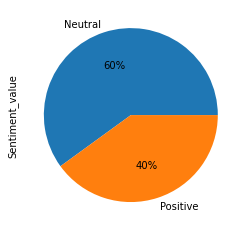

In [43]:
print(df.Sentiment_value.value_counts())
df.Sentiment_value.value_counts().plot(kind='pie',autopct='%1.0f%%')

As per the files provided for positive and negative words, 60% reviews are neutral and 40% are positive reviews.

#### 2. Using NLTK's SentimentIntensityAnalyzer

In [44]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(df.Cleaned_Reviews[3])

{'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.4404}

In [45]:
Score_df=pd.DataFrame()
Score_df['Reviews'] = df.body
Score_df['scores'] = df['Cleaned_Reviews'].apply(lambda review: sid.polarity_scores(review))
Score_df.head()

,Reviews,scores
0,Good product. Genuine leather,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp..."
1,Good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
2,There are some threads loosen up at bottom. I ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Have been using it for more than 5 years and t...,"{'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'comp..."
4,Very good quality,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp..."


In [46]:
Score_df['compound']  = Score_df['scores'].apply(lambda scores: scores['compound'])
Score_df.head()

,Reviews,scores,compound
0,Good product. Genuine leather,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404
1,Good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404
2,There are some threads loosen up at bottom. I ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,Have been using it for more than 5 years and t...,"{'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'comp...",0.4404
4,Very good quality,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...",0.4927


In [47]:
Score_df['sentiment'] = Score_df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
Score_df.head()

,Reviews,scores,compound,sentiment
0,Good product. Genuine leather,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404,Positive
1,Good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
2,There are some threads loosen up at bottom. I ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,Have been using it for more than 5 years and t...,"{'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'comp...",0.4404,Positive
4,Very good quality,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...",0.4927,Positive


Positive    568
Neutral      71
Negative     71
Name: sentiment, dtype: int64


<AxesSubplot:ylabel='sentiment'>

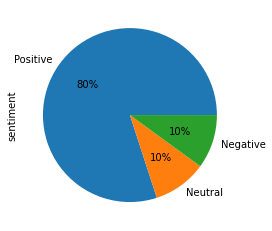

In [48]:
print(Score_df.sentiment.value_counts())
Score_df.sentiment.value_counts().plot(kind='pie',autopct='%1.0f%%')

As per the NLTK's Sentiment Intensity Analyser, around 80% of the reviews are positive, 10% are negative and 10% are neutral.